<a href="https://colab.research.google.com/github/Hamrita/Statistique-Mathematique/blob/main/TP2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistique sous R
## Statistique descriptive
Calcul des statistiques de base : moyenne, médiane, écart type, variance, corrélation ou covariance

In [15]:
x=c(-2,-1,0.5, 1, 1, 2, 3, 5, 8, 13, 21, 34)
cumsum(x)  # somme cumulée
cumprod(x) # produit cumulée
mean(x) # moyenne de x
median(x) # médiane
quantile(x,0.25)  # le 1er quantile
var(x) # variance empirique de x (le dénominateur est (n-1))
sd(x)  # écart-type empirique
summary(x)

[1] -2.0 -3.0 -2.5 -1.5 -0.5  1.5  4.5  9.5 17.5 30.5 51.5 85.5

[1]      -2       2       1       1       1       2       6      30     240
[10]    3120   65520 2227680

[1] 7.125

[1] 2.5

25% 
0.875

[1] 115.0966

[1] 10.72831

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -2.000   0.875   2.500   7.125   9.250  34.000 

In [16]:
y <- 0.25*log(x + 3)+1
cor(x,y)  # corrélation entre x et y
cov(x,y)  # covariance

[1] 0.8927911

[1] 2.467145

In [17]:
x <- c(0, 1, 1, 2, 3, NA)  # données contenant une valeur manquante
mean(x)
mean(x,na.rm = T)
sd(x, na.rm=T)

[1] NA

[1] 1.4

[1] 1.140175

## Probabilité
Pour effectuer un tirage aléatoire, on utilise la fonction "sample()"

In [18]:
set.seed(5)
sample(1:6,1)  # jeter un dé cubique
sample(1:6)  # tirage sans remise
sample(1:6, replace=T) # tirage avec remise

[1] 2

[1] 3 1 6 4 5 2

[1] 5 6 3 3 6 2

In [19]:
A=c(0,1,5,4)
2 %in% A   # tester si 2 est un élément de A
subset(A,A > mean(A))  # sous ensemble de A dont ces valeurs sont supérieur à la moyenne de A

[1] FALSE

[1] 5 4

## Lois de probabilités discrètes
### Loi de Bernoulli

In [20]:
set.seed(5)
x=sample(c(0,1),1)  # une réalisation de Bernoulli
x


[1] 1

In [21]:
# densité de Benoulli  dbinom()
set.seed(12345)
b1=dbinom(c(0,1),size=1, prob=0.6)   # Bernoulli de paramètre p=0.6
b1
# fonction de répartition
cumsum(b1)

# ou

pbinom(c(0,1),size=1,prob=0.6)

[1] 0.4 0.6

[1] 0.4 1.0

[1] 0.4 1.0

### Loi binômiale

In [22]:
# Soit X~B(n=10,p=0.6)

# générer des réalistions 

set.seed(12345)
sample(c(0,1),size=10, prob=c(0.4,0.6), replace=T)

# densité
binoM=dbinom(1:10,size=10, prob=0.6)
binoM 
# P(3 < X < 7)
sum(dbinom(4:6,size=10,prob=0.6))
# ou encore F(6)-F(3)
pbinom(6, size=10,prob=0.6)-pbinom(3, size=10,prob=0.6)

[1] 0 0 0 0 1 1 1 1 0 0

[1] 0.001572864 0.010616832 0.042467328 0.111476736 0.200658125 0.250822656
 [7] 0.214990848 0.120932352 0.040310784 0.006046618

[1] 0.5629575

[1] 0.5629575

### Loi de poisson

[1]  6  8  6  8  5  3  4  5  6 11

[1] 0.03368973 0.08422434 0.14037390 0.17546737 0.17546737

[1] 0.993193

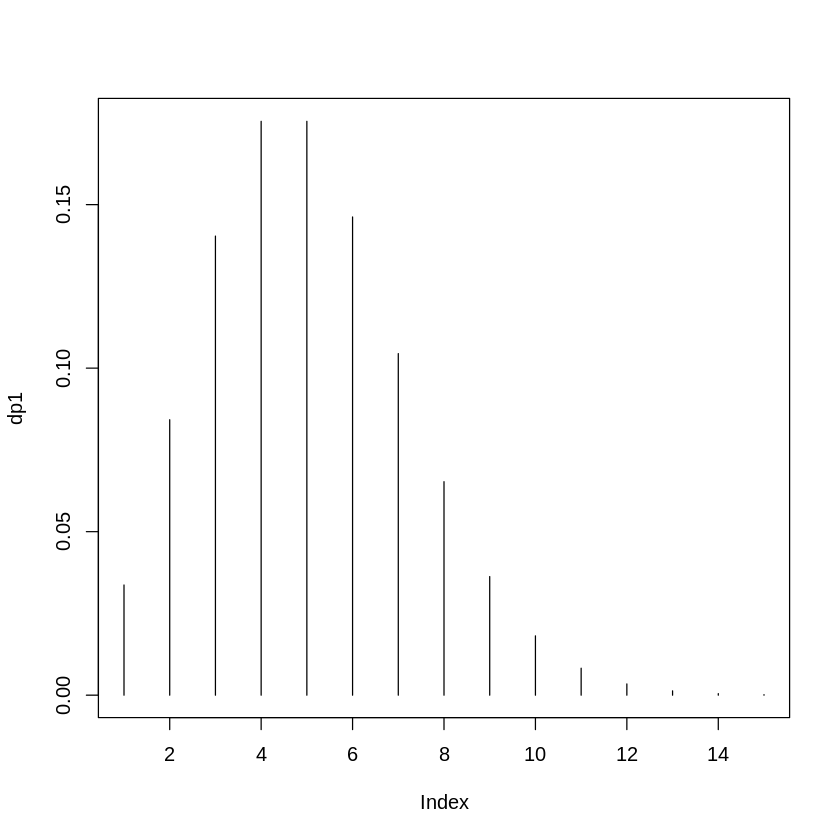

In [23]:
# générer 10 réalisations de loi poisson(5)
set.seed(12345)
p1=rpois(10,5)
p1

# densité de probabilité

dp1=dpois(1:15,5)
dp1[1:5]
# vérifions que la somme des prob est égale à 1
sum(dp1)
# représentation graphique de la densité
plot(dp1, type="h")

[1] 0.04042768 0.12465202 0.26502592 0.44049329 0.61596065 0.76218346
 [7] 0.86662833 0.93190637 0.96817194 0.98630473 0.99454691 0.99798115
[13] 0.99930201 0.99977375 0.99993099

[1] 0.6016024

[1] 0.6016024

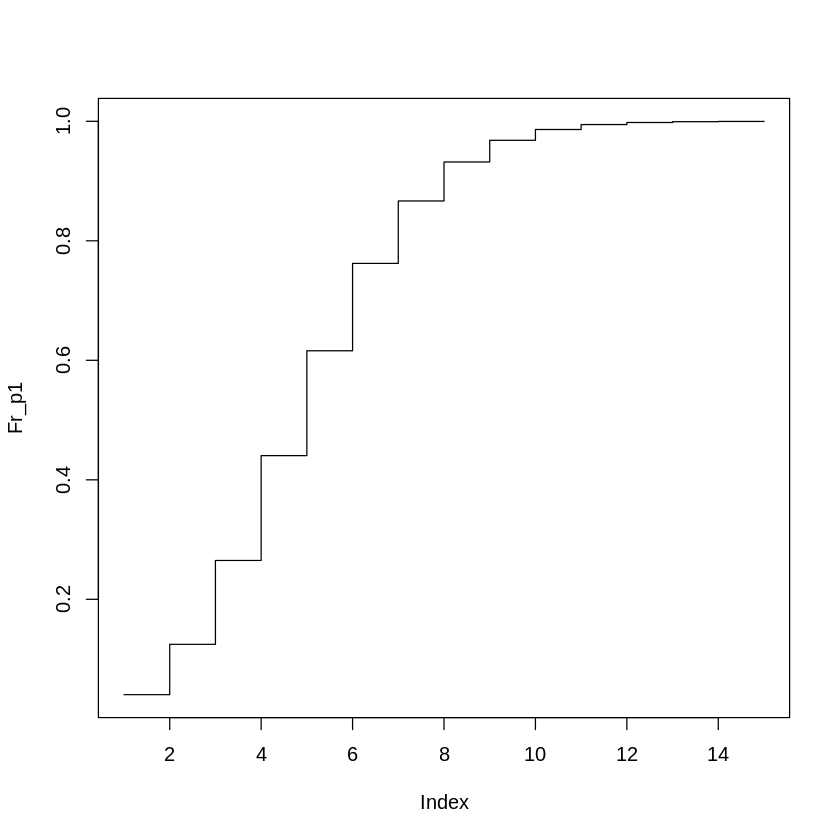

In [24]:
# fonction de répartition

Fr_p1=ppois(1:15,5)
Fr_p1

# P(3 < X < 8)
sum(dpois(4:7,5))
ppois(7,5)-ppois(3,5)
plot(Fr_p1, type="s")

## Lois de probabilité continue

**Exercice:**  Soit $X$ une variable aléatoire continue dont sa densité est définie par:
$$
f(x)=\begin{cases}
\dfrac{3}{4}\sqrt{1-|x|}\;\; \text{ si } x \in [-1,1]\\
0 \qquad \qquad \;\:\:\,\text{ sinon}
\end{cases}
$$
1. Vérifier que $f$ est bien une densité de probabilité. Donner la représentation graphique de cette distribution.
2. Déterminer la fonction de répartition de $X$. Calculer $\mathbb{P}(-0.5 \leq X \leq 1)$.
3. Calculer $\mathbb{E}(X)$ et $\mathbb{V}(X)$

In [25]:
# f est une densité si elle est >= 0 pour tout réel x et l'intégrale de f sur R est égale à 1.
# Tout d'abord, écrivons l'expression de f
f=function(x){
  ifelse(-1 <= x & x <=1, 3/4*sqrt(1-abs(x)),0)
}

x=seq(-2,2, len=200)
fx=sapply(x,f)

# première condition: f(x)>=0
all(fx >=0) # TRUE

# deuxième condition
options(warn = -1)
integrate(f,-Inf,+Inf)   # 1

[1] TRUE

1 with absolute error < 2e-05

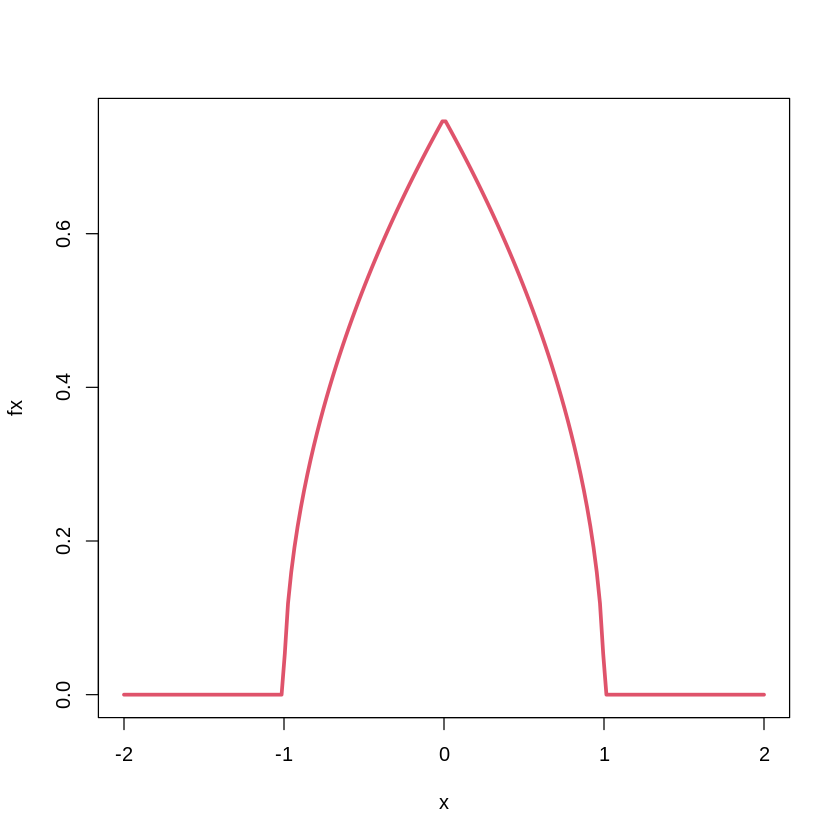

In [26]:
# Représentation graphique

plot(x,fx, type="l", lwd=3, col=2)

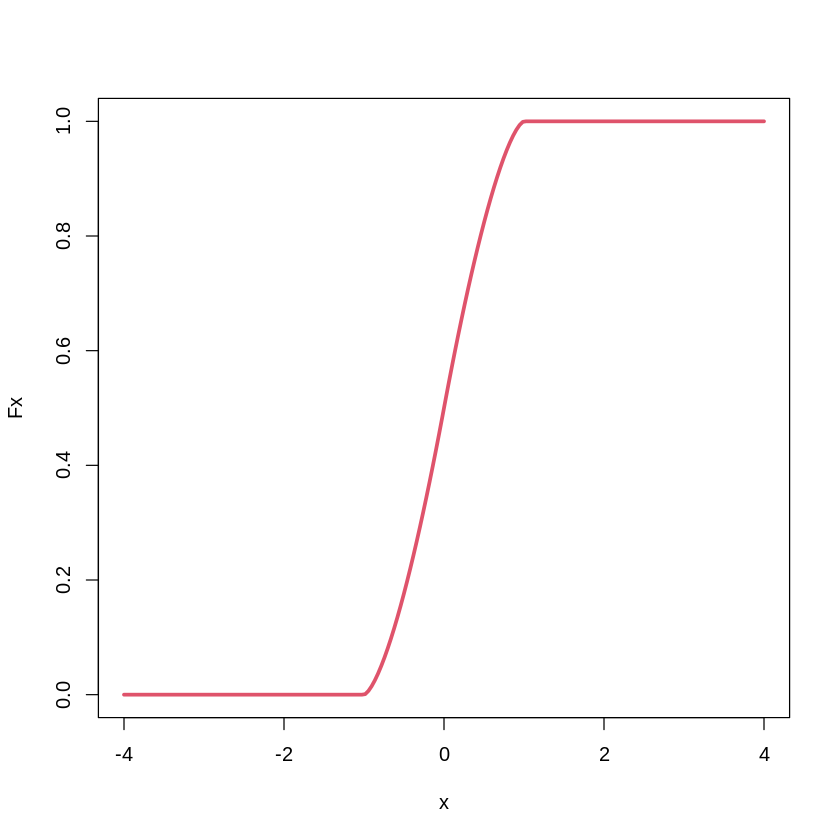

In [13]:
# Fonction de répartition
Fr_X=function(x){
  if (x <= -1) {y=0
  }else if(1 <= x) {y=1
  }else {y=integrate(function(t) 3/4*sqrt(1-abs(t)),-1,x)$value
  }
  y
}
x=seq(-4,4,len=200)
Fx=sapply(x,Fr_X)
plot(x,Fx, type="l",lwd=3, col=2)

$\mathbb{P}(-0.5 \leq X \leq 1)=F(1)-F(-0.5)=\displaystyle{\int_{-0.5}^1f(x)dx}$

In [27]:
pp=integrate(f,-0.5,1)
pp$value
# ou
Fr_X(1)-Fr_X(-0.5)

[1] 0.8232233

[1] 0.8232232

In [28]:
# E(X)

f2=function(x)  ifelse(-1 <= x & x <=1, 3/4*x*sqrt(1-abs(x)),0)
integrate(f2,-Inf,+Inf)$value

# V(X)=E(X^2)-E(X)^2=E(X^2) car E(X)=0

f2=function(x)  ifelse(-1 <= x & x <=1, 3/4*x^2*sqrt(1-abs(x)),0)
integrate(f2,-Inf,+Inf)$value

[1] 0

[1] 0.2285714

## Quelques lois usuelles
### Loi normale

**Exercice:** 

Soit la variable normale $X \sim N(m=2,\sigma=0.25)$.
1. Donner la représentation graphique de cette distribution.
2. Générer 100 réalisation de cette distribution et les représenter graphiquement.
3. Calculer les probablités suivantes: $\mathbb{P}(X \leq 1.82) $, $\mathbb{P}(X > 2.25) $ et $\mathbb{P}(2.1 \leq X \leq 2.4) $.
4. Déterminer les quantiles $q$ dans chacun des cas suivants: $\mathbb{P}(X \leq q)= 0.3 $, $\mathbb{P}(X \leq q)=0.95$.

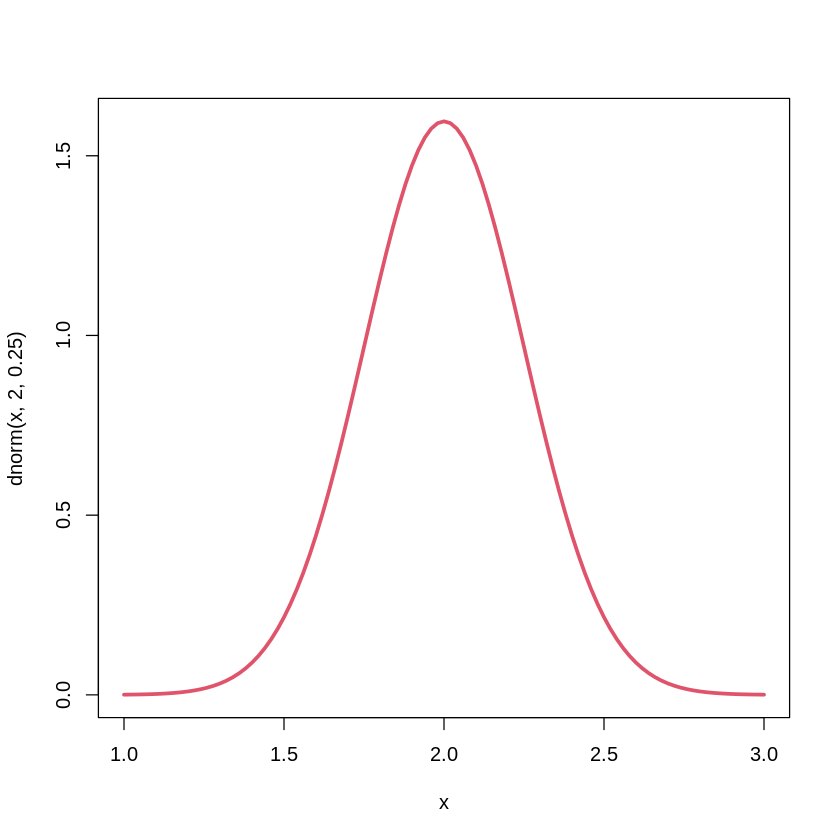

In [ ]:
# représentation graphique
curve(dnorm(x,2,0.25), 1,3, lwd=3, col=2)

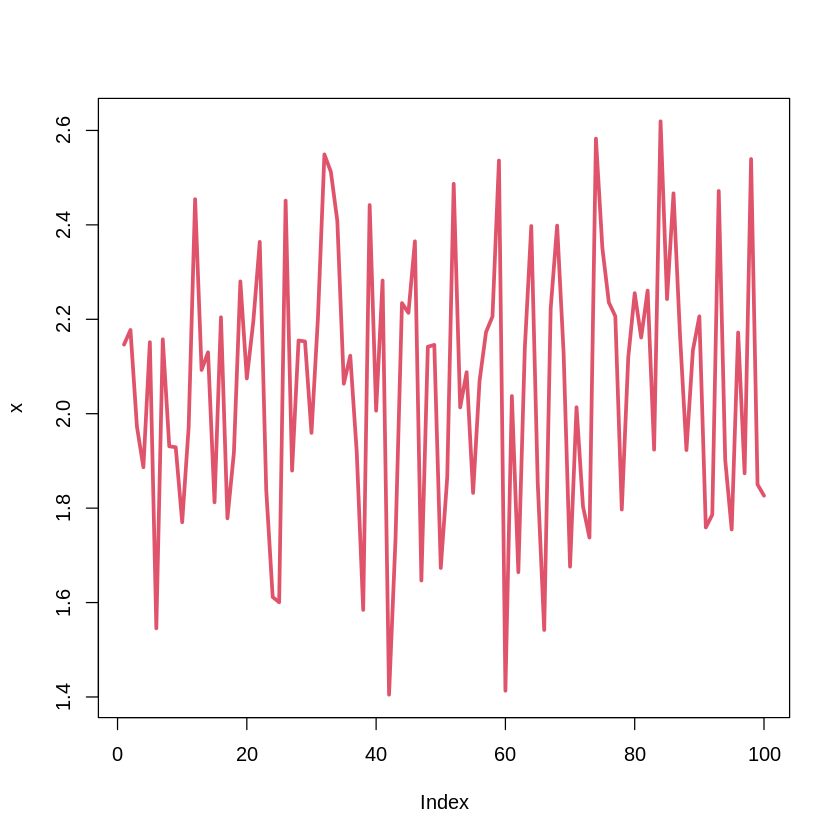

In [ ]:
# simulation de 10 réalisayions
set.seed(12345)
x=rnorm(100,mean=2,sd=0.25)
plot(x, type="l",lwd=3,col=2)

$\mathbb{P}(X \leq 1.2) =F(1.2)$ où $F()$ est la fonction de répartition de $X$

In [ ]:
# P(X <= 2) 
pnorm(1.82,mean=2, sd=0.25)

# P(X >2.25) = 1- P(X <= -0.25)
1-pnorm(2.25,2,.25)

# ou
pnorm(2.25,2,.25,lower.tail = F)

#  P(2.1 <= X <= 2.4) 
pnorm(2.4,2,0.25)-pnorm(2.1,2,0.25)

[1] 0.2357625

[1] 0.1586553

[1] 0.1586553

[1] 0.289779

In [ ]:
# quantiles (qnorm)

# P(X <= q)=0.3

qnorm(0.3,2,0.25)

# P(X <= q)=0.95

qnorm(0.3,2,0.95)

[1] 1.8689

[1] 1.50182